In [1]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr

['sad', 'happy']

In [4]:
image_exts = ['jpeg', 'jpg', 'bmp','png']

In [43]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [44]:
import numpy as np
from matplotlib import pyplot as plt

In [81]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 175 files belonging to 2 classes.


In [82]:
data_iterator = data.as_numpy_iterator()

In [83]:
batch = data_iterator.next()

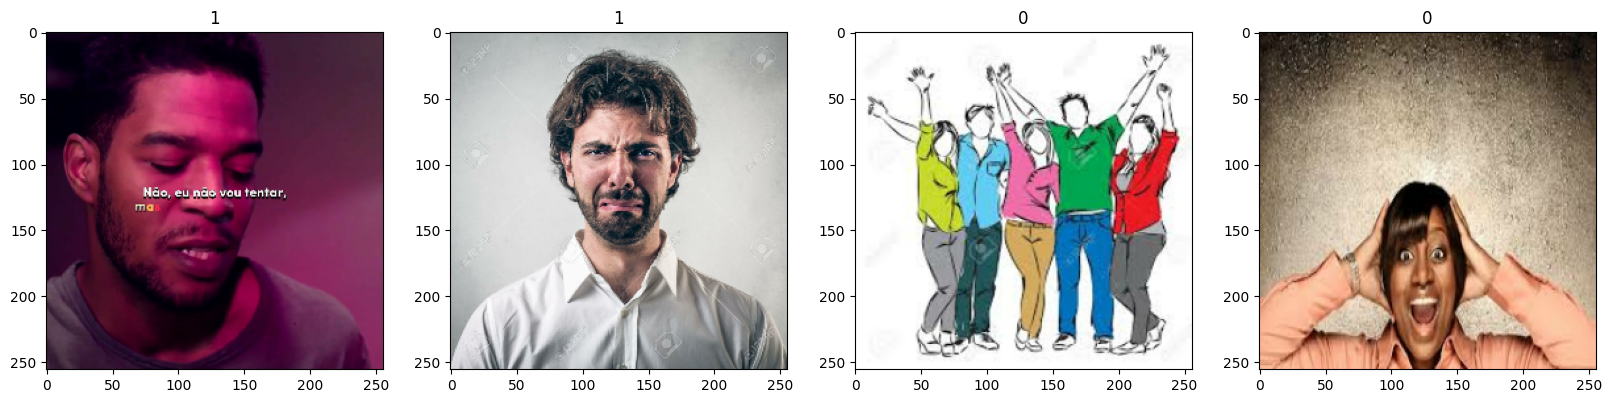

In [84]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [49]:
data = data.map(lambda x,y: (x/255, y))

In [50]:
data.as_numpy_iterator().next()

(array([[[[0.7143468 , 0.66336644, 0.5966998 ],
          [0.7176471 , 0.6666667 , 0.6       ],
          [0.7190591 , 0.6680787 , 0.6053336 ],
          ...,
          [0.64841944, 0.68092555, 0.6921235 ],
          [0.6106252 , 0.63023305, 0.6454751 ],
          [0.5775199 , 0.59320617, 0.59421724]],
 
         [[0.7172917 , 0.6663113 , 0.59964466],
          [0.7176471 , 0.6666667 , 0.6       ],
          [0.72156864, 0.67058825, 0.60784316],
          ...,
          [0.61608505, 0.6401271 , 0.65132505],
          [0.56924266, 0.58588636, 0.59849995],
          [0.53250784, 0.5481941 , 0.5492052 ]],
 
         [[0.7186657 , 0.66768533, 0.60101867],
          [0.72123975, 0.67025936, 0.6035927 ],
          [0.7225873 , 0.6716069 , 0.6088618 ],
          ...,
          [0.57450384, 0.5950657 , 0.6026731 ],
          [0.52213746, 0.534883  , 0.5446252 ],
          [0.49921653, 0.51490283, 0.51098126]],
 
         ...,
 
         [[0.61316144, 0.417083  , 0.21708299],
          [0.61274

In [54]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [58]:
val_size

1

In [56]:
len(data)

6

In [59]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [60]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [62]:
model = Sequential()

In [65]:
model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
#3,3 tarayacağı piksel boyutu 
#1 değeri her seferinde kaç piksel ilerleyeceği
model.add(Conv2D(32,(3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [66]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [68]:
logdir = 'logs'

In [69]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [70]:
hist = model.fit(train ,epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 3s 348ms/step - loss: 1.3940 - accuracy: 0.4609 - val_loss: 1.0765 - val_accuracy: 0.4375
Epoch 2/20
4/4 [==============================] - 1s 282ms/step - loss: 0.8840 - accuracy: 0.4375 - val_loss: 0.6641 - val_accuracy: 0.5938
Epoch 3/20
4/4 [==============================] - 2s 314ms/step - loss: 0.6552 - accuracy: 0.5703 - val_loss: 0.6320 - val_accuracy: 0.5938
Epoch 4/20
4/4 [==============================] - 1s 259ms/step - loss: 0.6199 - accuracy: 0.5938 - val_loss: 0.7098 - val_accuracy: 0.4062
Epoch 5/20
4/4 [==============================] - 1s 285ms/step - loss: 0.6101 - accuracy: 0.5859 - val_loss: 0.6165 - val_accuracy: 0.5312
Epoch 6/20
4/4 [==============================] - 1s 269ms/step - loss: 0.5527 - accuracy: 0.7500 - val_loss: 0.4557 - val_accuracy: 0.9375
Epoch 7/20
4/4 [==============================] - 1s 253ms/step - loss: 0.5389 - accuracy: 0.8203 - val_loss: 0.3526 - val_accuracy: 0.8438
Epoch 8/20
4/4 [====

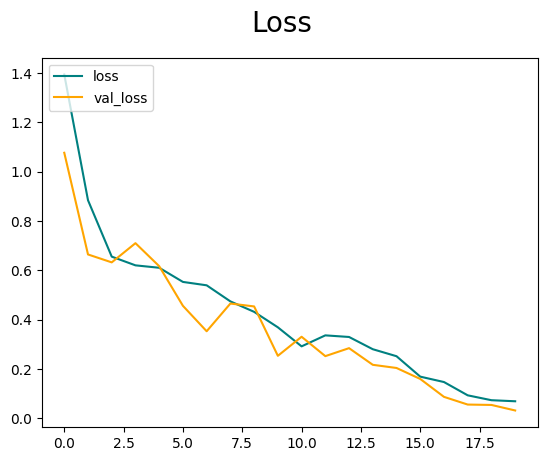

In [71]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

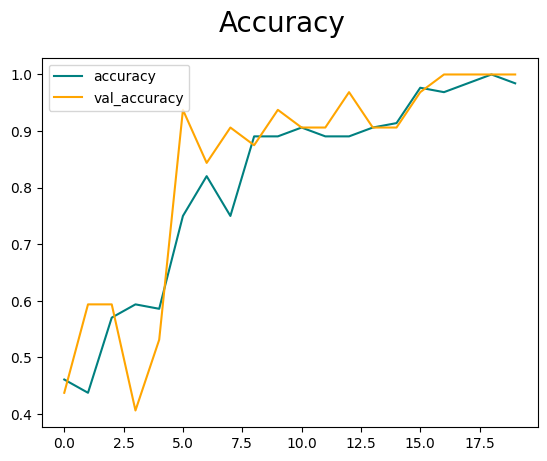

In [72]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [73]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [74]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [75]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 63ms/step


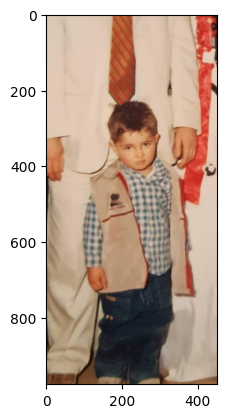

In [100]:
img= cv2.imread('onurk.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

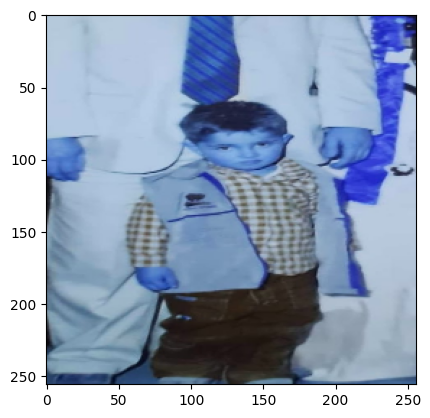

In [101]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [102]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 23ms/step


In [103]:
yhat

array([[0.59531564]], dtype=float32)

In [104]:
if yhat > 0.5:
    print('Sad')
else:
    print('Happy')

Sad
